# 1.数据读取

利用pandas中merge函数合并多个csv文件，并通过主键(date)进行链接。当然也可以通过mysql等数据库工具对csv文件进行整理后再导入pandas。

In [1]:
import pandas as pd
import numpy as np

df_hpi = pd.read_csv(r"C:\Users\zhouwentao\Desktop\data_totall\monthly-hpi.csv")   #主表，因变量，房价指数
df_upl = pd.read_csv(r"C:\Users\zhouwentao\Desktop\data_totall\unemployment-macro.csv") # 自变量，失业率
df_ffr = pd.read_csv(r"C:\Users\zhouwentao\Desktop\data_totall\fed_funds.csv")  #自变量，联邦利率
df_cpi = pd.read_csv(r"C:\Users\zhouwentao\Desktop\data_totall\shiller.csv")    #自变量，cpi指数，长期利率，sp500指数
df_gdp = pd.read_csv(r"C:\Users\zhouwentao\Desktop\data_totall\gdp.csv") #自变量，gdp

In [2]:
df_data = df_cpi.merge(df_upl, on='date')\
                    .merge(df_gdp, on='date')\
                    .merge(df_ffr, on='date')\
                    .merge(df_hpi, on='date')

In [3]:
#查看数据结构
df_data.head()

,date,sp500,consumer_price_index,long_interest_rate,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product,federal_funds_rate,housing_price_index
0,2011-01-01,1282.62,220.22,3.39,16.2,8393,2800,6816,6.5,60.1,5766.7,64.2,192.7,14881.3,0.17,181.35
1,2011-04-01,1331.51,224.91,3.46,16.1,8016,2466,6823,6.8,59.4,5870.8,64.2,203.1,14989.6,0.10,180.80
2,2011-07-01,1325.19,225.92,3.00,15.9,8177,2785,6850,6.8,59.2,5802.6,64.0,204.6,15021.1,0.07,184.25
3,2011-10-01,1207.22,226.42,2.15,15.8,7802,2555,6917,8.0,57.9,5812.9,64.1,201.1,15190.3,0.07,181.51
4,2012-01-01,1300.58,226.66,1.97,15.2,7433,2809,7022,7.4,57.1,5765.7,63.7,200.7,15291.0,0.08,179.13


In [4]:
#查看行列
df_data.shape

(23, 16)

通过观察数据结构，可以看出housing_price_index是我们要预测的变量即因变量y，其他变量为观测变量也就是自变量x。可以结合专业知识和业务经验筛选变量，这里共有16个变量，23个样本量，date不作为变量，所以共15个变量。

# 2.数据清洗

2.1去除重复值

In [5]:
#查看重复值
df_data.duplicated()  

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
dtype: bool

注：如果有重复值，需要删除，用df_data.drop_duplicates("变量")

2.2 查看缺失值

In [6]:
df_data.isnull()

,date,sp500,consumer_price_index,long_interest_rate,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product,federal_funds_rate,housing_price_index
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


注：如果有缺失值则需要填充，可以选择平均数、中位数、众数进行填充，到底选用哪一种方法，需要结合具体数据以及业务经验确定。

2.3 异常值检测及处理

In [7]:
#查看有无异常值
df_data.describe() 

,sp500,consumer_price_index,long_interest_rate,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product,federal_funds_rate,housing_price_index
count,23.000000,23.000000,23.00000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,1697.955652,232.821739,2.26913,13.004348,5602.521739,2317.173913,7088.217391,8.495652,52.917391,5914.082609,63.265217,198.421739,15795.756522,0.145217,204.955652
std,322.596751,5.405947,0.54516,2.267052,1801.301143,294.338187,248.798742,1.316496,4.059854,176.572817,0.561337,7.786875,571.226411,0.093121,19.364036
min,1207.220000,220.220000,1.50000,9.700000,3175.000000,1715.000000,6816.000000,6.500000,47.600000,5745.400000,62.500000,182.600000,14881.300000,0.070000,179.130000
25%,1373.105000,229.595000,1.89500,11.050000,3912.000000,2137.500000,6895.500000,7.500000,49.200000,5773.600000,62.800000,192.350000,15371.600000,0.090000,187.840000
50%,1720.030000,233.600000,2.09000,13.600000,5807.000000,2347.000000,7007.000000,8.200000,53.600000,5841.400000,62.900000,202.500000,15747.000000,0.120000,205.440000
75%,1998.955000,237.250000,2.60000,14.700000,7027.500000,2497.500000,7308.000000,9.700000,55.500000,5970.850000,63.700000,203.600000,16321.600000,0.155000,218.645000
max,2148.900000,240.650000,3.46000,16.200000,8393.000000,2809.000000,7577.000000,10.900000,60.100000,6307.500000,64.200000,208.300000,16727.000000,0.390000,241.590000


通过预览数据整体情况，重点关注平均值，标准差，最大值，最小值等查看有无异常值的存在。fillna()函数进行填充;dropna()进行删除空值。

异常值检测方法：

方法一：3sigma原则：若正态分布，异常值定义为偏差超出平均值的三倍标准差；否则，可用远离平均值的多少倍来描述。

方法二：箱线图分析：异常值定义为小于Q_L-1.5IQR或者大于Q_U +1.5IQR。Q_L是下四分位数，全部数据有四分之一比他小。Q_U是上四分位数。IQR称为四分位数间距


# 3.预分析(特征选择)

预分析用来筛选合适的特征（变量）。可以使用相关性分析或者绘制散点图来检查x与y是否呈线性关系，x与x是否有共线性,从而来筛选变量。变量筛选尤为重要，如果筛选不当会产生过拟合或是欠拟合现象。

#方法一：调用seaborn包，做散点图，分析相关性

In [8]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

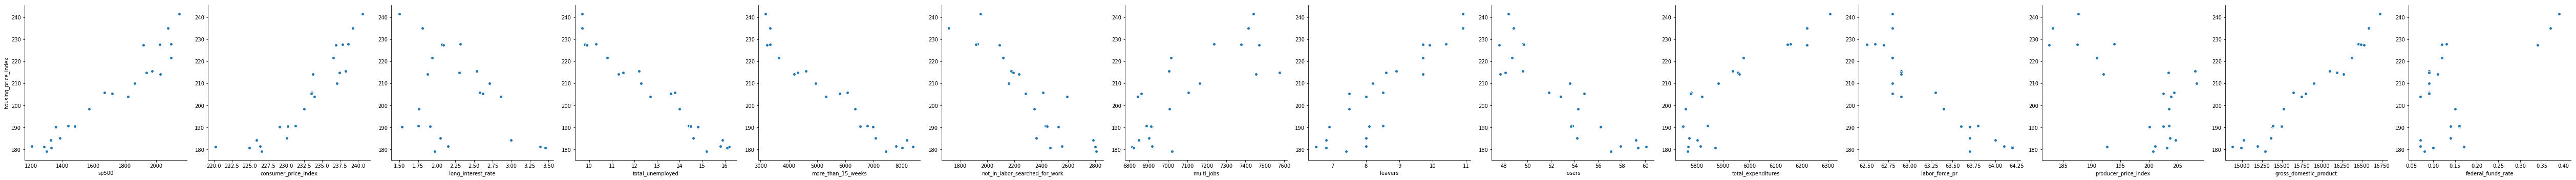

In [9]:
sns.pairplot(df_data, x_vars=['sp500','consumer_price_index','long_interest_rate',\
                              'total_unemployed','more_than_15_weeks','not_in_labor_searched_for_work',\
                              'multi_jobs','leavers','losers',\
                              'total_expenditures','labor_force_pr','producer_price_index',\
                              'gross_domestic_product','federal_funds_rate'], y_vars='housing_price_index', size=5,aspect=1)
plt.show()

通过散点图可以看出：long_interest_rate(10年期债券收益率)与phi相关性并不明显，考虑到模型的准确性，排除lir； producer_price_index(生产者价格指数),federal_funds_rate(联邦基金利率/同业拆借利率)与phi房价指数呈微弱相关，可以保留；最终保留8个特征进入模型

#方法二：pandas中带有相关系数函数pandas.corr()，pandas.DataFrame.corr(),要求数据的type是DataFrame,return的结果也是DataFame格式。pandas.corr()返回的是相关系数矩阵，列与列的两两相关。对于相关系数的判定标准不一，根据自己的需要进行合理解释，这里采用标准<0.3,微相关或不相关，0.3 - 0.5 低度相关,0.5 - 0.8 显著相关,0.8 - 1 高度相关。注：.corr()默认为皮尔逊相关。

In [10]:
type(df_data)

pandas.core.frame.DataFrame

In [11]:
corr_matrix=df_data.corr()
corr_matrix

,sp500,consumer_price_index,long_interest_rate,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product,federal_funds_rate,housing_price_index
sp500,1.000000,0.923372,-0.268089,-0.959047,-0.971915,-0.856560,0.742614,0.855760,-0.913242,0.781037,-0.941233,-0.496051,0.959274,0.372566,0.960468
consumer_price_index,0.923372,1.000000,-0.434417,-0.921749,-0.939406,-0.883247,0.714263,0.841448,-0.909034,0.722605,-0.926848,-0.335281,0.933372,0.384849,0.923467
long_interest_rate,-0.268089,-0.434417,1.000000,0.410265,0.403301,0.403981,-0.411748,-0.509524,0.494381,-0.298756,0.295334,0.344231,-0.451033,-0.441148,-0.353817
total_unemployed,-0.959047,-0.921749,0.410265,1.000000,0.994147,0.896420,-0.825065,-0.917441,0.929736,-0.872403,0.925589,0.641777,-0.991416,-0.517291,-0.975517
more_than_15_weeks,-0.971915,-0.939406,0.403301,0.994147,1.000000,0.893572,-0.803648,-0.905185,0.944514,-0.836933,0.944752,0.586836,-0.993347,-0.464792,-0.972029
not_in_labor_searched_for_work,-0.856560,-0.883247,0.403981,0.896420,0.893572,1.000000,-0.727847,-0.874050,0.821083,-0.825992,0.805012,0.550419,-0.899720,-0.534462,-0.903926
multi_jobs,0.742614,0.714263,-0.411748,-0.825065,-0.803648,-0.727847,1.000000,0.773518,-0.809372,0.784621,-0.691852,-0.595127,0.823856,0.497295,0.789606
leavers,0.855760,0.841448,-0.509524,-0.917441,-0.905185,-0.874050,0.773518,1.000000,-0.886491,0.885333,-0.761688,-0.670143,0.924650,0.589725,0.903842
losers,-0.913242,-0.909034,0.494381,0.929736,0.944514,0.821083,-0.809372,-0.886491,1.000000,-0.726257,0.869899,0.488644,-0.940262,-0.414208,-0.892854
total_expenditures,0.781037,0.722605,-0.298756,-0.872403,-0.836933,-0.825992,0.784621,0.885333,-0.726257,1.000000,-0.670171,-0.775035,0.858887,0.699799,0.878971


In [12]:
#查看因变量与自变量之间的相关性，筛选变量
corr_matrix["housing_price_index"]

sp500                             0.960468
consumer_price_index              0.923467
long_interest_rate               -0.353817
total_unemployed                 -0.975517
more_than_15_weeks               -0.972029
not_in_labor_searched_for_work   -0.903926
multi_jobs                        0.789606
leavers                           0.903842
losers                           -0.892854
total_expenditures                0.878971
labor_force_pr                   -0.904213
producer_price_index             -0.621928
gross_domestic_product            0.976960
federal_funds_rate                0.561913
housing_price_index               1.000000
Name: housing_price_index, dtype: float64

利用因变量之间的共线性进行筛选。total_unemployed、more_than_15_weeks、not_in_labor_searched_for_work、leavers对y的影响都很大，但它们之间存在高度的共线性，因此只取total_unemployed即可；结合散点图，long_interest_rated 线性关系不明显，删除该变量;producer_price_index,federal_funds_rate与因变量微弱相关，可以保留。其他变量对因变量的影响较大，确定进入模型。
选择特征时，首先根据业务知识和与y的相关性，选取影响较大的因素，然后再考虑共线性问题，如果实在不知道怎么选，可以先保留，跑完模型之后再调整。

In [16]:
X = df_data[['consumer_price_index','total_unemployed','total_expenditures','labor_force_pr','producer_price_index',\
                  'gross_domestic_product','federal_funds_rate','housing_price_index']]
X.head()

,consumer_price_index,total_unemployed,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product,federal_funds_rate,housing_price_index
0,220.22,16.2,5766.7,64.2,192.7,14881.3,0.17,181.35
1,224.91,16.1,5870.8,64.2,203.1,14989.6,0.10,180.80
2,225.92,15.9,5802.6,64.0,204.6,15021.1,0.07,184.25
3,226.42,15.8,5812.9,64.1,201.1,15190.3,0.07,181.51
4,226.66,15.2,5765.7,63.7,200.7,15291.0,0.08,179.13


# 4.数据标准化：
#从上表我们可以看到，gross_domestic_product变量的值多在10,000以上，而federal_funds_rate的值多<1,变量值的差别挺大，其他数据也如此，为消除这种量纲可能带来的影响，最好在进行模型训练前先对数据进行规范化处理，有3种方法：1.标准化；2.归一化；3.正则化

In [17]:
#数据标准化
from sklearn.preprocessing import StandardScaler   #调用StandardScaler类进行处理
X_scaler = StandardScaler() 
X_std = X_scaler.fit_transform(X) #通过获取的方差及均值转换数据
print(X_std)

[[-2.38347882  1.4412873  -0.85344389  1.70270659 -0.75130703 -1.63684426
   0.27211435 -1.2464438 ]
 [-1.49641748  1.39618579 -0.25063526  1.70270659  0.61429055 -1.44299116
  -0.49648934 -1.27548532]
 [-1.30538721  1.30598278 -0.64555887  1.33840658  0.81125174 -1.38660729
  -0.82589092 -1.09331577]
 [-1.21081777  1.26088127 -0.58591498  1.52055658  0.35167563 -1.08374538
  -0.82589092 -1.23799535]
 [-1.16542444  0.99027223 -0.85923455  0.79195655  0.29915265 -0.90349601
  -0.71609039 -1.36366594]
 [-0.51667808  0.71966318 -0.82738588  0.79195655  0.69307503 -0.77569258
  -0.05728723 -1.03840089]
 [-0.70392557  0.8098662  -0.97678513  0.79195655  0.22036817 -0.74275724
   0.16231382 -0.76910677]
 [-0.28403726  0.62946017 -0.42088092  0.97410656  0.66681354 -0.73649236
   0.16231382 -0.74534552]
 [-0.48074169  0.67456168 -0.96172939  0.60980655  0.53550608 -0.54389224
  -0.05728723 -0.76329846]
 [-0.05517921  0.44905414 -0.91077151  0.24550653  0.66681354 -0.49073031
   0.0525133  -0.

In [20]:
df_new = pd.DataFrame(X_std,columns = ['consumer_price_index','total_unemployed','total_expenditures',\
                                       'labor_force_pr','producer_price_index',\
                  'gross_domestic_product','federal_funds_rate','housing_price_index'])
df_new.head()

,consumer_price_index,total_unemployed,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product,federal_funds_rate,housing_price_index
0,-2.383479,1.441287,-0.853444,1.702707,-0.751307,-1.636844,0.272114,-1.246444
1,-1.496417,1.396186,-0.250635,1.702707,0.614291,-1.442991,-0.496489,-1.275485
2,-1.305387,1.305983,-0.645559,1.338407,0.811252,-1.386607,-0.825891,-1.093316
3,-1.210818,1.260881,-0.585915,1.520557,0.351676,-1.083745,-0.825891,-1.237995
4,-1.165424,0.990272,-0.859235,0.791957,0.299153,-0.903496,-0.716090,-1.363666


# 5.构建模型

In [21]:
#方法一：通过formula模型构建
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
housing_model = ols("housing_price_index ~ consumer_price_index + total_unemployed \
                    + total_expenditures + labor_force_pr + producer_price_index \
                    + gross_domestic_product + federal_funds_rate", data=df_new).fit()

housing_model_summary = housing_model.summary()

housing_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.972
Model:                             OLS   Adj. R-squared:                  0.959
Method:                  Least Squares   F-statistic:                     75.08
Date:                 Thu, 21 Dec 2017   Prob (F-statistic):           1.54e-10
Time:                         10:53:37   Log-Likelihood:                 8.5866
No. Observations:                   23   AIC:                            -1.173
Df Residuals:                       15   BIC:                             7.911
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -4.58e-16      0.043  -1.06e-14      1.000      -0.092       0.092
consumer_price_index       0.3772      0.342      1.104      0.287      -0.351       1.105
total_unemployed           0.1364      0.447      0.305      0.764      -0.816       1.089
total_expenditures         0.2370      0.136      1.737      0.103      -0.054       0.528
labor_force_pr            -0.2653      0.194     -1.370      0.191      -0.678       0.148
producer_price_index      -0.1246      0.196     -0.634      0.536      -0.543       0.294
gross_domestic_product     0.2069      0.402      0.514      0.614      -0.650       1.064
federal_funds_rate         0.0520      0.096      0.541      0.597      -0.153       0.257
==============================================================================
Omnibus:                        1.047   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.593   Jarque-Bera (JB):                0.189
Skew:                          -0.133   Prob(JB):                        0.910
Kurtosis:                       3.354   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#方法二：通过python 中 ols 模型构建
import statsmodels.api as sm

In [24]:
X,y = df_new.ix[:,:-1],df_new.ix[:,-1]
#print(X,y)
housing_price_model=sm.OLS(y,X).fit()
housing_price_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.972
Model:                             OLS   Adj. R-squared:                  0.960
Method:                  Least Squares   F-statistic:                     80.08
Date:                 Thu, 21 Dec 2017   Prob (F-statistic):           2.93e-11
Time:                         10:54:10   Log-Likelihood:                 8.5866
No. Observations:                   23   AIC:                            -3.173
Df Residuals:                       16   BIC:                             4.775
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
consumer_price_index       0.3772      0.331      1.140      0.271      -0.324       1.078
total_unemployed           0.1364      0.433      0.315      0.757      -0.781       1.054
total_expenditures         0.2370      0.132      1.794      0.092      -0.043       0.517
labor_force_pr            -0.2653      0.188     -1.415      0.176      -0.663       0.132
producer_price_index      -0.1246      0.190     -0.655      0.522      -0.528       0.279
gross_domestic_product     0.2069      0.389      0.531      0.602      -0.618       1.032
federal_funds_rate         0.0520      0.093      0.559      0.584      -0.145       0.249
==============================================================================
Omnibus:                        1.047   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.593   Jarque-Bera (JB):                0.189
Skew:                          -0.133   Prob(JB):                        0.910
Kurtosis:                       3.354   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#R²为决定系数，反应因变量的全部变异能通过回归关系被自变量解释的比例。R²的值越接近1，说明回归直线对观测值的拟合程度越好；反之，R²的值越小，说明回归直线对观测值的拟合程度越差。
#correlation coefficient (coef) ：相关系数是在自变量变化一个单位所产生的因变量的变化，所有其他变量保持不变。在我们的模型中，如#consumer_price_index增加一个单位，可增加2.5325的housing_price_index。
#p-value：p值就是假设的否命题 成立的概率，因为非常小，所以否命题为假，即原命题为真。p-value一般小于0.05时为显著，也可以根据实际情况设为0.1或0.01。
#置信区间是我们的系数可能下降的一个范围。如我们可以95%确信consumer_price_index系数将在[-0.324	1.078]置信区间内。


In [25]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

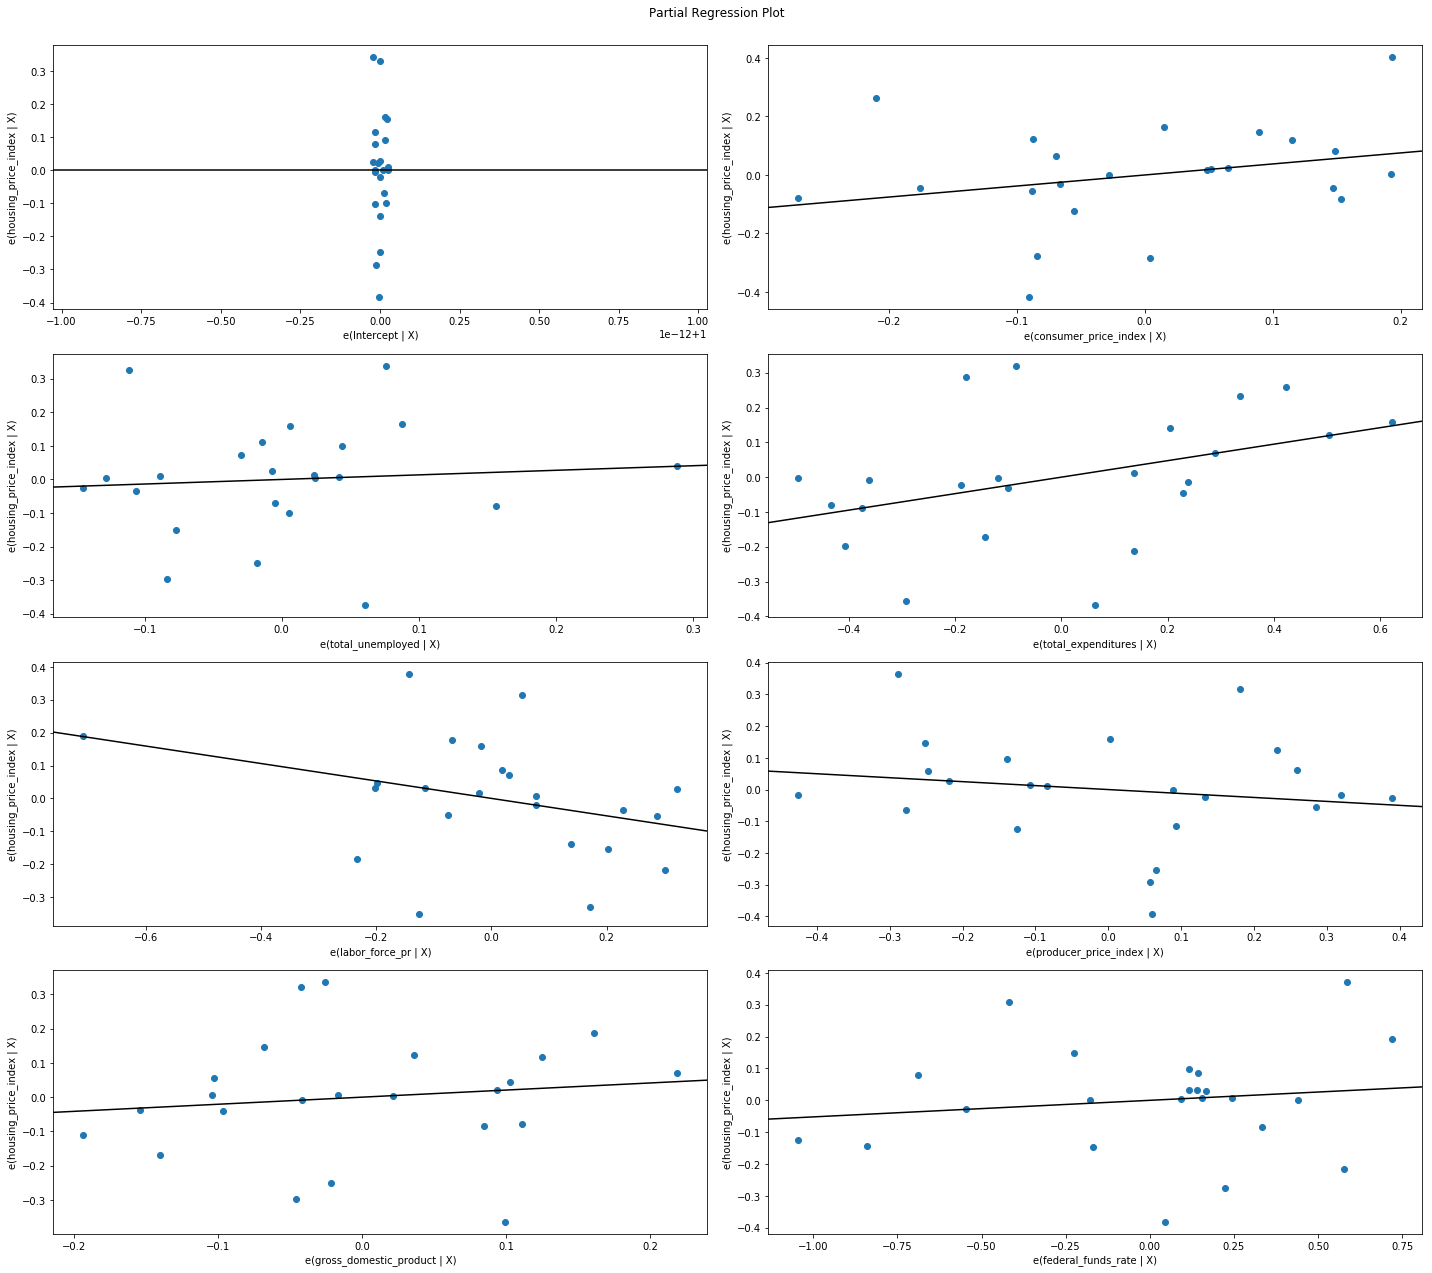

In [26]:
fig = plt.figure(figsize=(20,18))
fig = sm.graphics.plot_partregress_grid(housing_model, fig=fig)

#注：intercept为截距。
#从上图可以看出：total呈近似一条直线，所以总失业率不太可能影响到房价。虽然总失业率可能与房价指数是有关联的，但其他预测变量似乎是更能预测房价的变化。

# 调整

通过上述分析，我们删除预测效果较差的变量total_unemployed，producer_price_index，federal_funds_rate

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

housing_model = ols("housing_price_index ~ consumer_price_index  \
                    + total_expenditures + labor_force_pr \
                    + gross_domestic_product", data=df_new).fit()

housing_model_summary = housing_model.summary()

housing_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.968
Model:                             OLS   Adj. R-squared:                  0.961
Method:                  Least Squares   F-statistic:                     135.4
Date:                 Thu, 21 Dec 2017   Prob (F-statistic):           3.57e-13
Time:                         11:20:52   Log-Likelihood:                 6.8920
No. Observations:                   23   AIC:                            -3.784
Df Residuals:                       18   BIC:                             1.893
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -4.58e-16      0.042  -1.08e-14      1.000      -0.089       0.089
consumer_price_index       0.1883      0.135      1.396      0.180      -0.095       0.472
total_expenditures         0.2882      0.112      2.578      0.019       0.053       0.523
labor_force_pr            -0.1650      0.155     -1.063      0.302      -0.491       0.161
gross_domestic_product     0.4006      0.243      1.651      0.116      -0.109       0.910
==============================================================================
Omnibus:                        0.845   Durbin-Watson:                   1.205
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.191
Skew:                           0.205   Prob(JB):                        0.909
Kurtosis:                       3.177   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

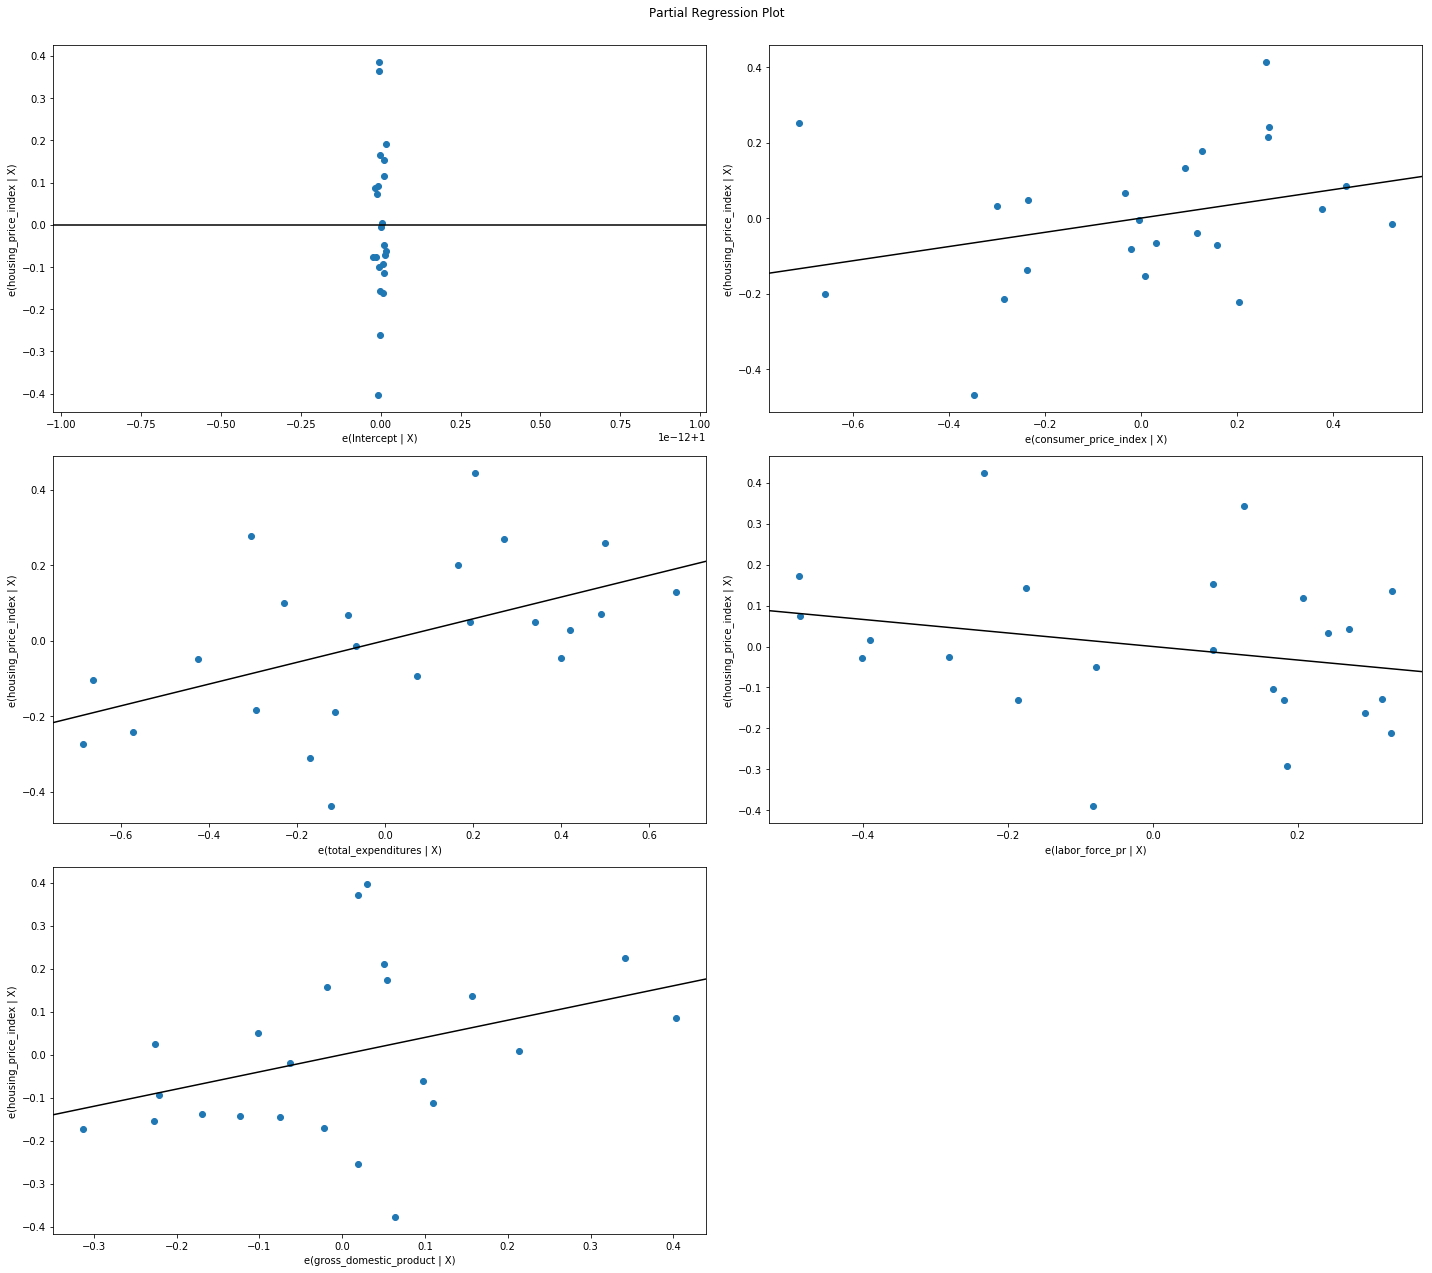

In [28]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,18))
fig = sm.graphics.plot_partregress_grid(housing_model, fig=fig)

经过调整后，R方与P值有所提升，模型拟合效果也有提升。

回归方程：
y = -4.58 + 0.1883*consumer_price_index + 0.2882*total_expenditures -0.1650*labor_force_pr + 0.4006*gross_domestic_product